In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import emoji
import plotly.express as px
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

Project: Nigeria's Economy  (1990 - 2023)
The link: https://en.wikipedia.org/wiki/Economy_of_Nigeria

In [12]:
df = pd.read_excel(r"C:\Users\BAMIDELE\Desktop\Project\Oyesiji Qowiyy\Nigeria Economy 2.xlsx")

In [13]:
df.head()

,Year,Inflation rate,Unemployment,Government debt,Agriculture,Industry,Services,GDP at 2010 Constant Basic Prices,NetTaxesOnProducts,GDP at 2010 Constant Market Prices
0,1990,0.0740,0.056,0.717,3464.72,11148.10,6849.92,21462.73,217.47,21680.20
1,1991,0.1301,0.041,0.750,3590.84,10910.56,7038.21,21539.61,218.28,21757.90
2,1992,0.4460,0.041,0.702,3674.79,11578.98,7283.32,22537.10,228.45,22765.55
3,1993,0.5720,0.041,0.710,3743.67,10790.31,7544.10,22078.07,224.17,22302.24
4,1994,0.5703,0.041,0.559,3839.68,10151.70,7685.48,21676.85,220.62,21897.47


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Year                                34 non-null     int64  
 1   Inflation rate                      34 non-null     float64
 2   Unemployment                        34 non-null     float64
 3   Government debt                     34 non-null     float64
 4   Agriculture                         34 non-null     float64
 5   Industry                            34 non-null     float64
 6   Services                            34 non-null     float64
 7   GDP at 2010 Constant Basic Prices   34 non-null     float64
 8   NetTaxesOnProducts                  34 non-null     float64
 9   GDP at 2010 Constant Market Prices  34 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 2.8 KB


In [15]:
df.isnull().sum()

Year                                  0
Inflation rate                        0
Unemployment                          0
Government debt                       0
Agriculture                           0
Industry                              0
Services                              0
GDP at 2010 Constant Basic Prices     0
NetTaxesOnProducts                    0
GDP at 2010 Constant Market Prices    0
dtype: int64

Objective 1: Examine the fluctuations in inflation rates over the 33-year period and assess their correlation with other economic indicators.

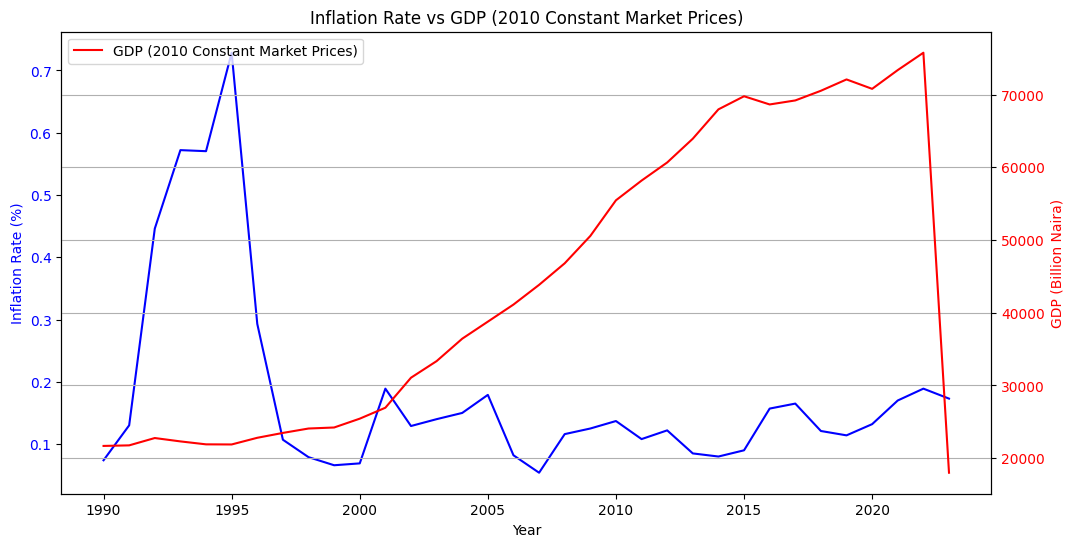

Correlation between Inflation Rate and GDP: -0.37


In [16]:
# Ensure 'Year' is set as the index
df.set_index('Year', inplace=True)

plt.figure(figsize=(12, 6))
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(df.index, df['Inflation rate'], 'b-', label='Inflation Rate')
ax2.plot(df.index, df['GDP at 2010 Constant Market Prices'], 'r-', label='GDP (2010 Constant Market Prices)')

ax1.set_xlabel('Year')
ax1.set_ylabel('Inflation Rate (%)', color='b')
ax2.set_ylabel('GDP (Billion Naira)', color='r')

ax1.tick_params(axis='y', labelcolor='b')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Inflation Rate vs GDP (2010 Constant Market Prices)')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

# Calculate correlation
correlation = df['Inflation rate'].corr(df['GDP at 2010 Constant Market Prices'])
print(f"Correlation between Inflation Rate and GDP: {correlation:.2f}")

Objective 2: Study the evolution of unemployment rates and identify potential factors contributing to the surge in recent years.

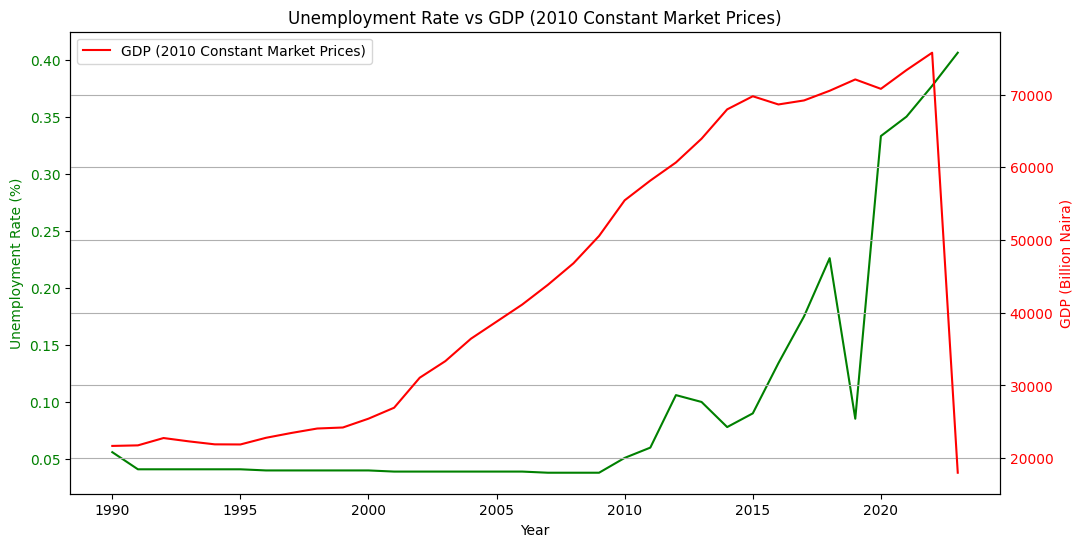

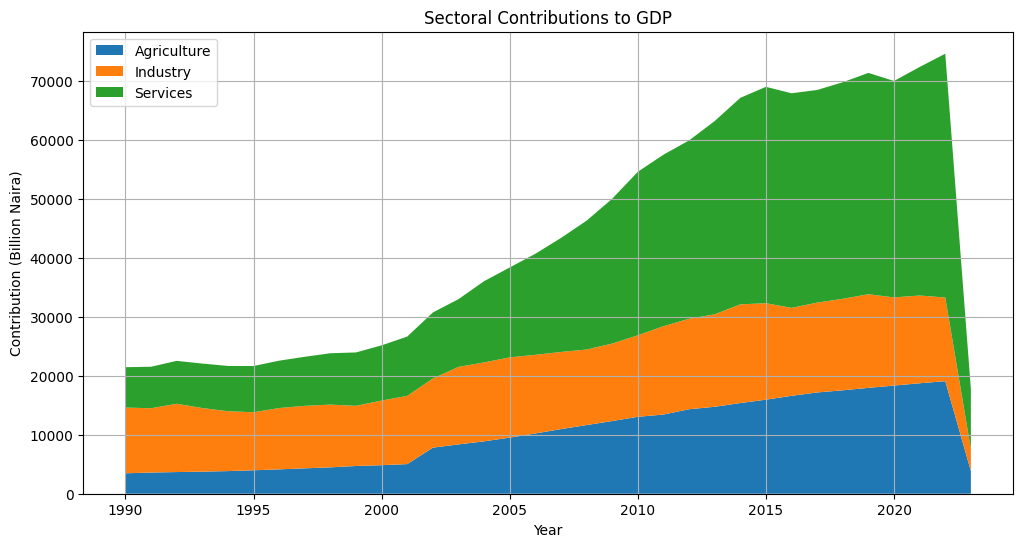

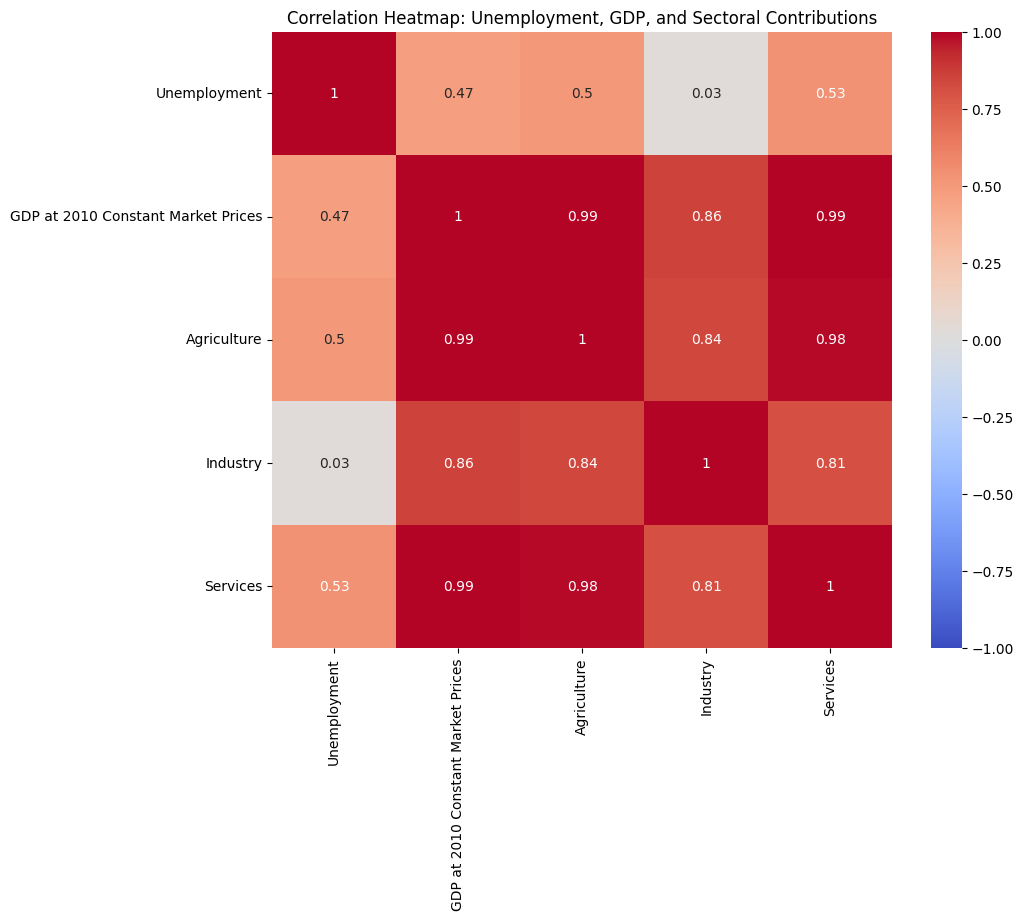

Correlations with Unemployment:
Unemployment                          1.000000
GDP at 2010 Constant Market Prices    0.472787
Agriculture                           0.500231
Industry                              0.030106
Services                              0.532958
Name: Unemployment, dtype: float64


In [17]:
plt.figure(figsize=(12, 6))
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(df.index, df['Unemployment'], 'g-', label='Unemployment Rate')
ax2.plot(df.index, df['GDP at 2010 Constant Market Prices'], 'r-', label='GDP (2010 Constant Market Prices)')

ax1.set_xlabel('Year')
ax1.set_ylabel('Unemployment Rate (%)', color='g')
ax2.set_ylabel('GDP (Billion Naira)', color='r')

ax1.tick_params(axis='y', labelcolor='g')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Unemployment Rate vs GDP (2010 Constant Market Prices)')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

# Sectoral contribution stacked area chart
plt.figure(figsize=(12, 6))
plt.stackplot(df.index, df['Agriculture'], df['Industry'], df['Services'], 
              labels=['Agriculture', 'Industry', 'Services'])
plt.title('Sectoral Contributions to GDP')
plt.xlabel('Year')
plt.ylabel('Contribution (Billion Naira)')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

# Calculate correlations
correlations = df[['Unemployment', 'GDP at 2010 Constant Market Prices', 'Agriculture', 'Industry', 'Services']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap: Unemployment, GDP, and Sectoral Contributions')
plt.show()

print("Correlations with Unemployment:")
print(correlations['Unemployment'])

Objective 3: Evaluate the growth of government debt in relation to GDP and other economic indicators to gauge fiscal sustainability.

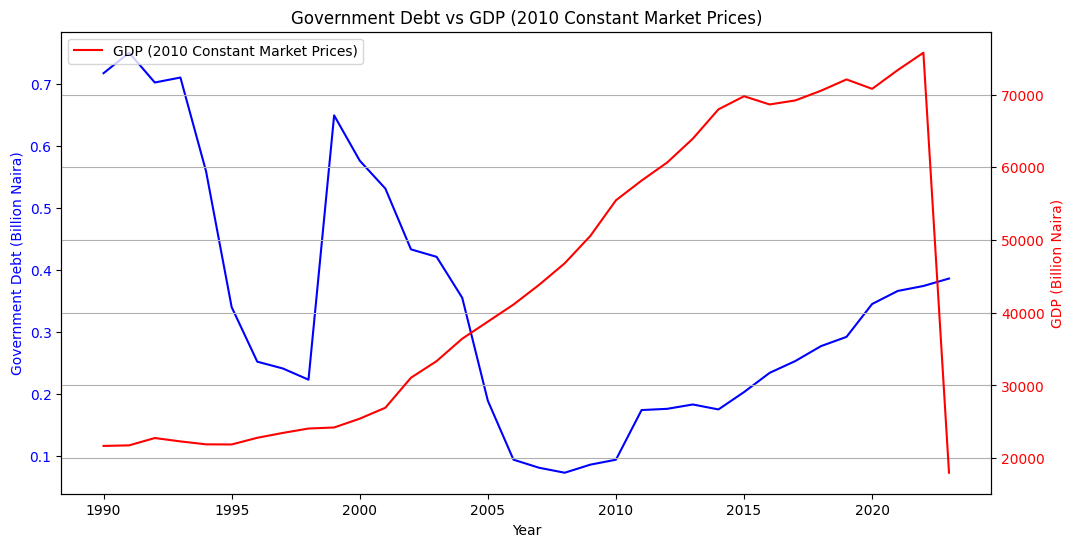

In [19]:
# Calculate Debt-to-GDP ratio
df['Debt_to_GDP_Ratio'] = df['Government debt'] / df['GDP at 2010 Constant Market Prices'] * 100

# Plotting Government Debt and GDP over time
plt.figure(figsize=(12, 6))
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(df.index, df['Government debt'], 'b-', label='Government Debt')
ax2.plot(df.index, df['GDP at 2010 Constant Market Prices'], 'r-', label='GDP (2010 Constant Market Prices)')

ax1.set_xlabel('Year')
ax1.set_ylabel('Government Debt (Billion Naira)', color='b')
ax2.set_ylabel('GDP (Billion Naira)', color='r')

ax1.tick_params(axis='y', labelcolor='b')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Government Debt vs GDP (2010 Constant Market Prices)')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

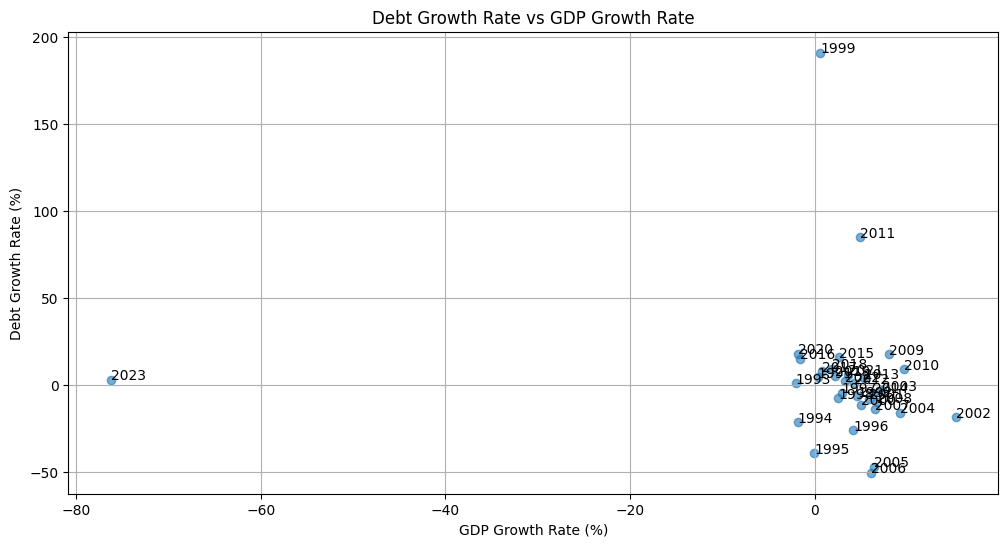

Correlation between Government Debt and GDP: -0.54

Summary Statistics for Debt-to-GDP Ratio:
count    34.000000
mean      0.001138
std       0.001072
min       0.000156
25%       0.000293
50%       0.000496
75%       0.001867
max       0.003447
Name: Debt_to_GDP_Ratio, dtype: float64

Year with highest Debt-to-GDP ratio: 1991 (0.00%)
Year with lowest Debt-to-GDP ratio: 2008 (0.00%)


In [20]:
# Calculate year-over-year growth rates
df['Debt_Growth_Rate'] = df['Government debt'].pct_change() * 100
df['GDP_Growth_Rate'] = df['GDP at 2010 Constant Market Prices'].pct_change() * 100

# Plotting Debt Growth Rate vs GDP Growth Rate
plt.figure(figsize=(12, 6))
plt.scatter(df['GDP_Growth_Rate'], df['Debt_Growth_Rate'], alpha=0.6)
plt.title('Debt Growth Rate vs GDP Growth Rate')
plt.xlabel('GDP Growth Rate (%)')
plt.ylabel('Debt Growth Rate (%)')
plt.grid(True)

# Adding year labels to each point
for i, txt in enumerate(df.index):
    plt.annotate(txt, (df['GDP_Growth_Rate'].iloc[i], df['Debt_Growth_Rate'].iloc[i]))

plt.show()

# Correlation analysis
correlation = df['Government debt'].corr(df['GDP at 2010 Constant Market Prices'])
print(f"Correlation between Government Debt and GDP: {correlation:.2f}")

# Summary statistics
print("\nSummary Statistics for Debt-to-GDP Ratio:")
print(df['Debt_to_GDP_Ratio'].describe())

# Identify years with highest and lowest Debt-to-GDP ratios
max_ratio_year = df['Debt_to_GDP_Ratio'].idxmax()
min_ratio_year = df['Debt_to_GDP_Ratio'].idxmin()

print(f"\nYear with highest Debt-to-GDP ratio: {max_ratio_year} ({df['Debt_to_GDP_Ratio'][max_ratio_year]:.2f}%)")
print(f"Year with lowest Debt-to-GDP ratio: {min_ratio_year} ({df['Debt_to_GDP_Ratio'][min_ratio_year]:.2f}%)")

Objective 4: Analyze the relative contributions of agriculture, industry, and services sectors to GDP over time to identify economic diversification opportunities.

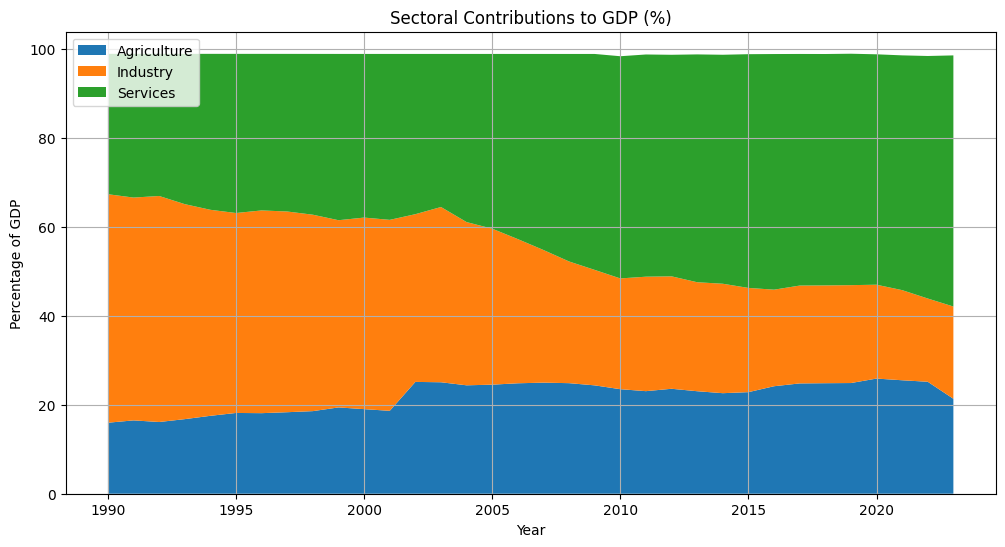

In [21]:
# Calculate percentage contributions
for sector in ['Agriculture', 'Industry', 'Services']:
    df[f'{sector}_Percentage'] = df[sector] / df['GDP at 2010 Constant Market Prices'] * 100

# Stacked area chart of sectoral contributions
plt.figure(figsize=(12, 6))
plt.stackplot(df.index, df['Agriculture_Percentage'], df['Industry_Percentage'], df['Services_Percentage'],
              labels=['Agriculture', 'Industry', 'Services'])
plt.title('Sectoral Contributions to GDP (%)')
plt.xlabel('Year')
plt.ylabel('Percentage of GDP')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

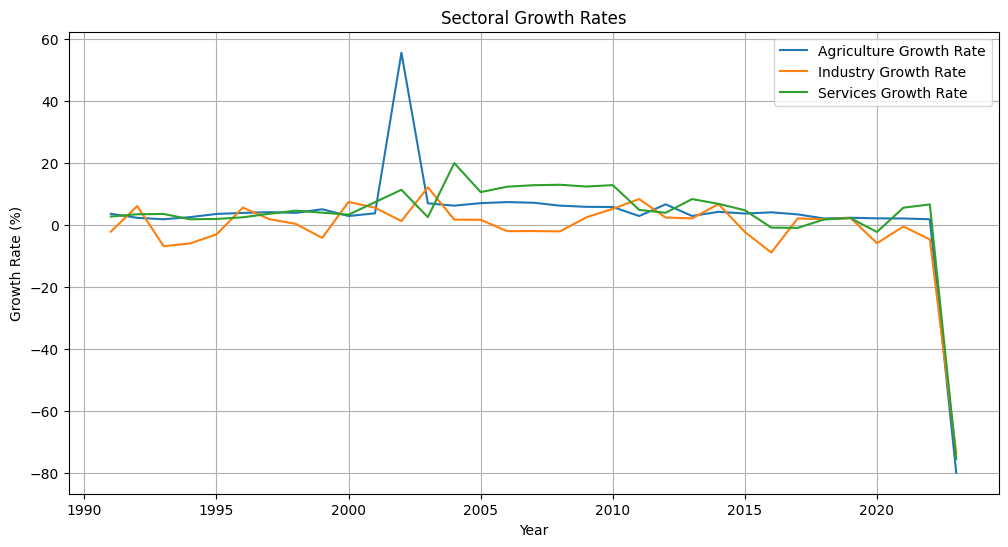

In [22]:
# Line plot of sectoral growth rates
plt.figure(figsize=(12, 6))
for sector in ['Agriculture', 'Industry', 'Services']:
    growth_rate = df[sector].pct_change() * 100
    plt.plot(df.index, growth_rate, label=f'{sector} Growth Rate')
plt.title('Sectoral Growth Rates')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.legend()
plt.grid(True)
plt.show()

Objective 5: Identify correlations and potential causal relationships between inflation, unemployment, government debt, and sectoral GDP contributions.

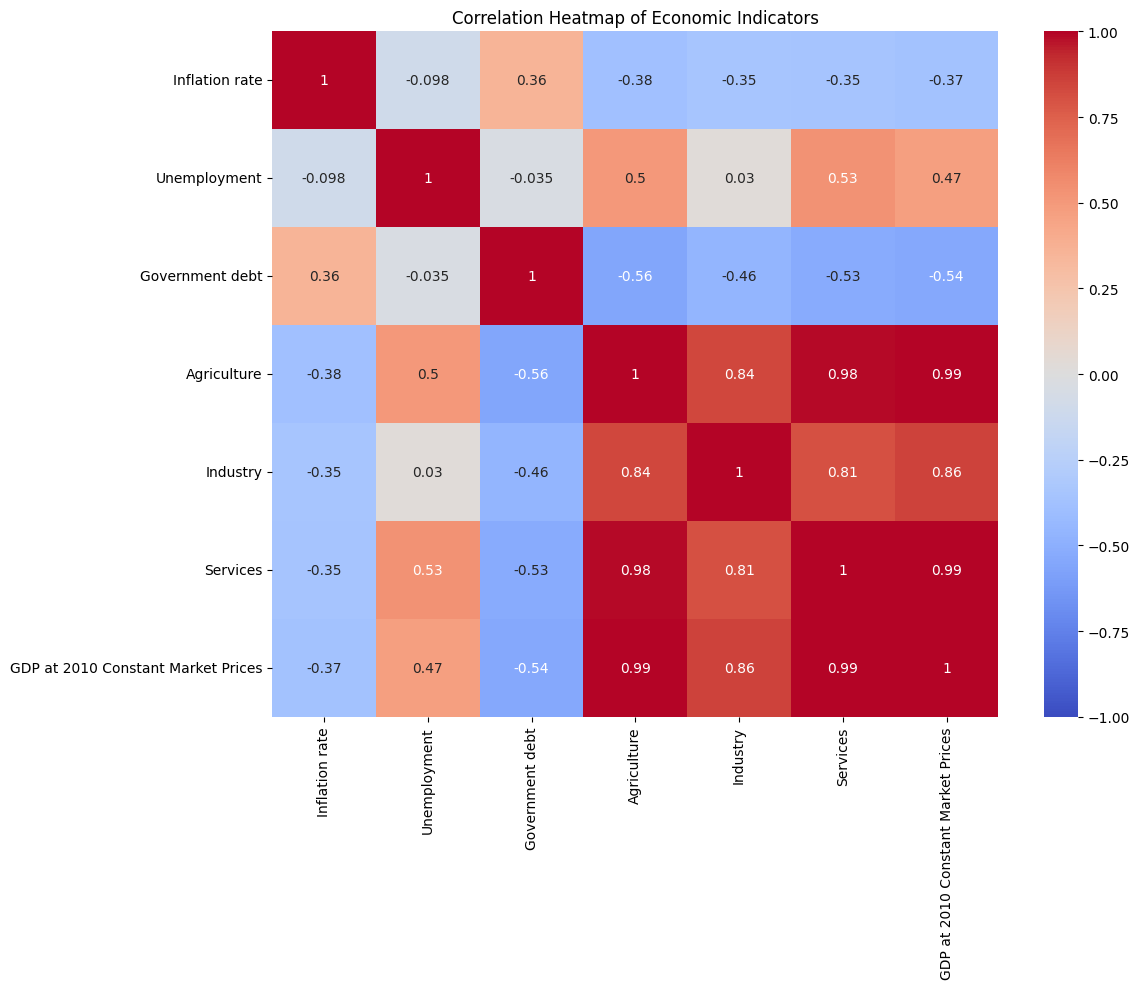

In [23]:
# Correlation heatmap
variables = ['Inflation rate', 'Unemployment', 'Government debt', 'Agriculture', 'Industry', 'Services', 'GDP at 2010 Constant Market Prices']
correlation_matrix = df[variables].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Economic Indicators')
plt.tight_layout()
plt.show()

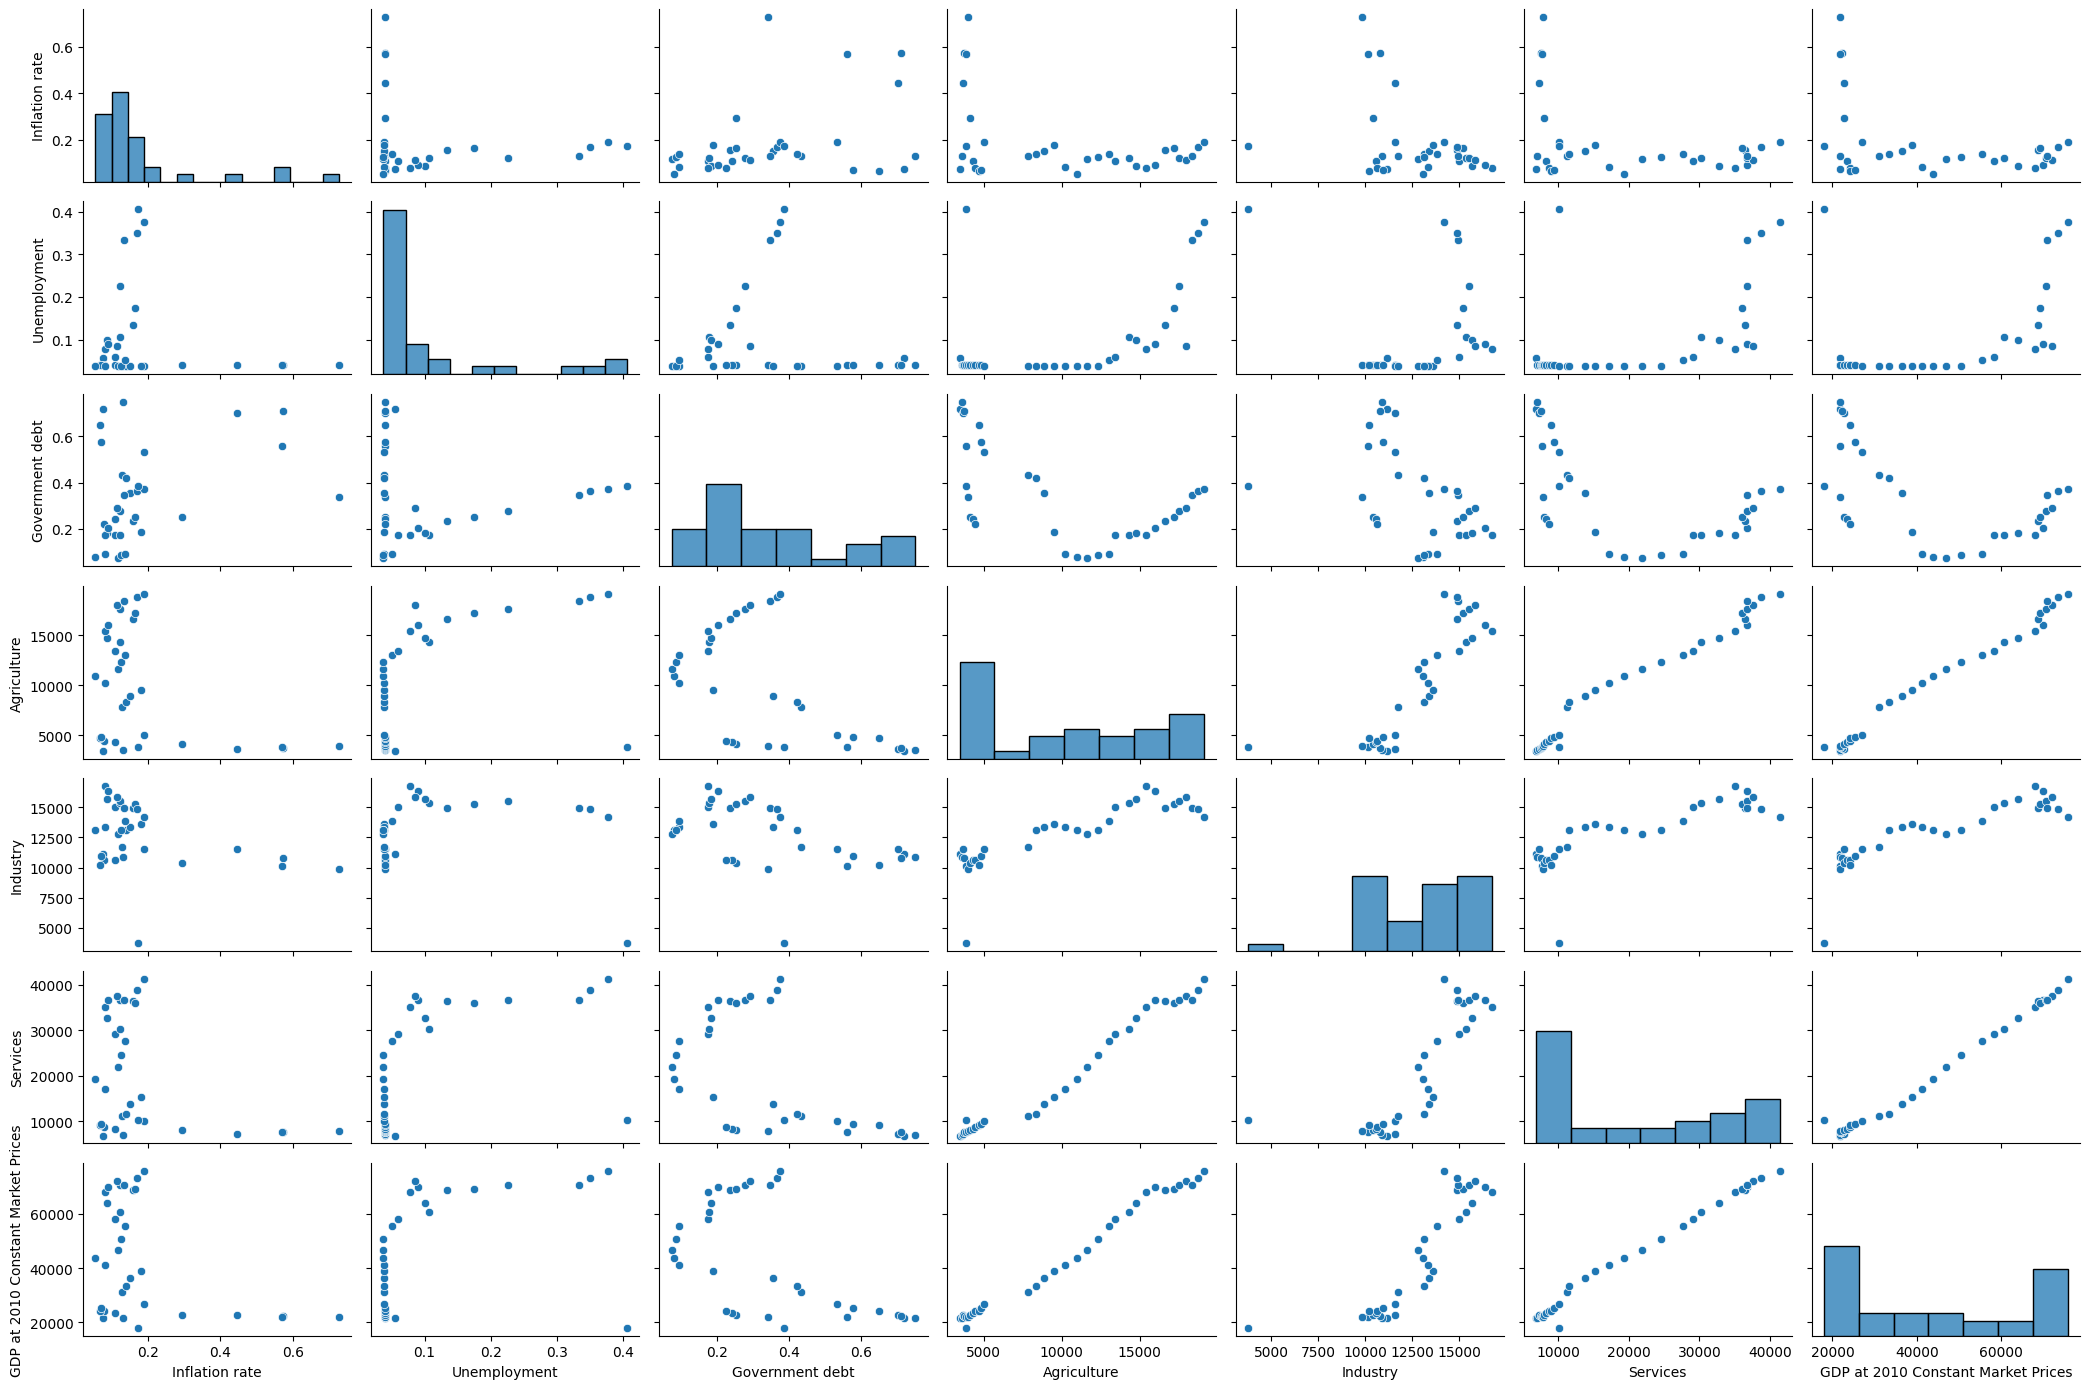

In [24]:
# Scatter plot matrix
sns.pairplot(df[variables], height=2, aspect=1.5)
plt.tight_layout()
plt.show()

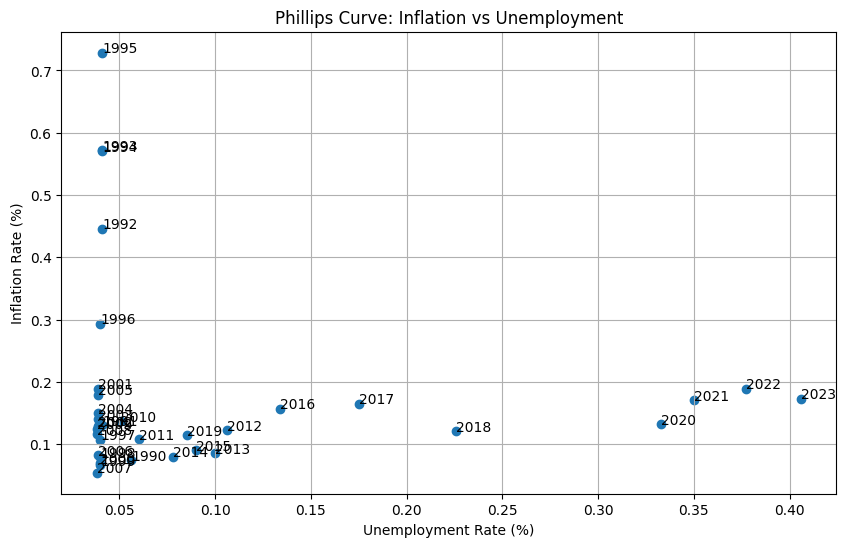

In [25]:
# Phillips Curve (Inflation vs Unemployment)
plt.figure(figsize=(10, 6))
plt.scatter(df['Unemployment'], df['Inflation rate'])
plt.title('Phillips Curve: Inflation vs Unemployment')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Inflation Rate (%)')
for i, txt in enumerate(df.index):
    plt.annotate(txt, (df['Unemployment'].iloc[i], df['Inflation rate'].iloc[i]))
plt.grid(True)
plt.show()

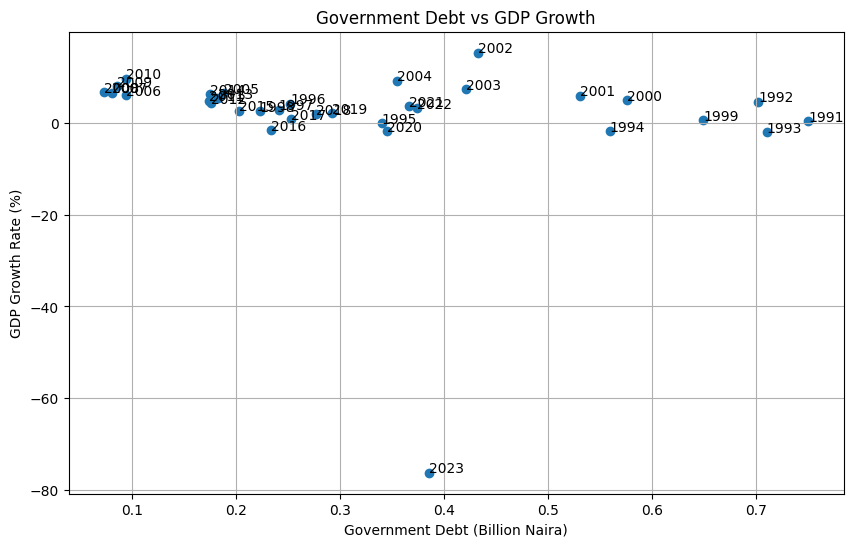

In [26]:
# Government Debt vs GDP Growth
df['GDP_Growth'] = df['GDP at 2010 Constant Market Prices'].pct_change() * 100
plt.figure(figsize=(10, 6))
plt.scatter(df['Government debt'], df['GDP_Growth'])
plt.title('Government Debt vs GDP Growth')
plt.xlabel('Government Debt (Billion Naira)')
plt.ylabel('GDP Growth Rate (%)')
for i, txt in enumerate(df.index):
    plt.annotate(txt, (df['Government debt'].iloc[i], df['GDP_Growth'].iloc[i]))
plt.grid(True)
plt.show()

In [27]:
# Print key findings
print("Key Findings:")
print("\nAverage Sectoral Contributions to GDP:")
for sector in ['Agriculture', 'Industry', 'Services']:
    print(f"{sector}: {df[f'{sector}_Percentage'].mean():.2f}%")

Key Findings:

Average Sectoral Contributions to GDP:
Agriculture: 21.98%
Industry: 33.45%
Services: 43.48%


In [28]:
print("\nCorrelations with GDP:")
for var in ['Inflation rate', 'Unemployment', 'Government debt']:
    corr = df[var].corr(df['GDP at 2010 Constant Market Prices'])
    print(f"{var}: {corr:.2f}")


Correlations with GDP:
Inflation rate: -0.37
Unemployment: 0.47
Government debt: -0.54


In [31]:
print("\nStrongest positive correlation:")
pos_corr = correlation_matrix.unstack().sort_values(ascending=False)
pos_corr = pos_corr[pos_corr < 1]  

# Exclude self-correlations (always 1)
print(f"{pos_corr.index[0][0]} and {pos_corr.index[0][1]}: {pos_corr.values[0]:.2f}")



Strongest positive correlation:
Services and GDP at 2010 Constant Market Prices: 0.99


In [32]:
print("\nStrongest negative correlation:")
neg_corr = correlation_matrix.unstack().sort_values()
print(f"{neg_corr.index[0][0]} and {neg_corr.index[0][1]}: {neg_corr.values[0]:.2f}")


Strongest negative correlation:
Agriculture and Government debt: -0.56
